In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import datetime as dt
import math as mt
# importing libraries
import statsmodels.api as sm
import pandas as pd 

### Data

In [18]:
df = pd.read_excel('Emhjellen_meteorological_Vestland_1991_2020.xlsx')
df= df.dropna()

In [19]:
year = df['Date'].dt.year
month = df['Date'].dt.month

In [20]:
df['Temp*Prec'] = df['Mean_daily_temp']*df['Daily_prec']

df['dummy_variable'] = 1

In [22]:
df

,Unnamed: 0,Date,Location,Mean_daily_temp,Daily_prec,Rockfall,Temp*Prec,dummy_variable
0,367,1991-01-03,4,-0.960000,22.44,0,-21.542400,1
1,367,1991-01-03,15,-3.650000,34.74,0,-126.801000,1
2,367,1991-01-03,2,-3.040000,12.08,0,-36.723200,1
3,367,1991-01-03,11,4.690000,22.19,0,104.071100,1
4,367,1991-01-03,5,-1.570000,15.99,0,-25.104300,1
...,...,...,...,...,...,...,...,...
76588,1707,2019-12-29,12,2.913452,21.73,1,63.309313,1
76589,3595,2019-12-30,7,2.730972,95.65,1,261.217475,1
76590,4422,2019-12-30,6,2.130326,43.06,1,91.731853,1
76591,5602,2019-12-30,4,6.246393,88.08,1,550.182286,1


### Seasons

In [5]:
# rockfall climate, daily temp

# spring

march = df[month== 3]
april = df[month== 4]
may = df[month== 5]

spring = [march, april, may]
spring = pd.concat(spring)


# summer 

jun = df[month == 6]
jul = df[month == 7]
aug = df[month == 8]

summer = [jun, jul, aug]
summer = pd.concat(summer)


# autumn

sep = df[month == 9]
okt = df[month == 10]
nov = df[month == 11]

autumn = [sep, okt, nov]
autumn = pd.concat(autumn)

# winter

dec = df[month == 12]
jan = df[month == 1]
feb = df[month == 2]

winter = [dec, jan, feb]
winter = pd.concat(winter)

In [6]:
Seasons = [spring, summer, autumn, winter]

In [7]:
Months = [df[month == 3],df[month == 4],df[month == 5],df[month == 6]
         ,df[month == 7],df[month == 8],df[month == 9],df[month == 10],df[month == 11],df[month == 12],df[month == 1],df[month == 2]]

In [7]:
Locations = [df[df['Location'] ==1], df[df['Location'] ==2],df[df['Location'] ==3], df[df['Location'] ==4], df[df['Location'] ==5], df[df['Location'] ==6], df[df['Location'] ==7],
            df[df['Location'] ==8], df[df['Location'] == 9], df[df['Location'] ==10], df[df['Location'] ==11], df[df['Location'] ==12],df[df['Location'] ==13],df[df['Location'] == 14],df[df['Location'] == 15],df[df['Location'] ==16]]

In [8]:
Months = [df[month == 1],df[month == 2],df[month == 3],df[month == 4]
         ,df[month == 5],df[month == 6],df[month == 7],df[month == 8],df[month == 9],df[month == 10],df[month == 11],df[month == 12]]

### Daily temperature for each month for Vestland, ignore locations


In [23]:
intercepts_Vestland = []
slope_x1_Vestland = []
slope_x2_Vestland = []
standard_error_coef_Vestland = []

standard_error_slope_Vestland_x1 = []
standard_error_slope_Vestland_x2 = []

likelihood_chi = []
aic = []
llr_pvalue = []

for k in Months:
    mean_daily_temp = k[['Daily_prec','Mean_daily_temp']].values
    mean_daily_temp.reshape(-1, 1)

    y = k['Rockfall']

    #centering the model
    #mean_daily_temp_mean = mean_daily_temp - np.mean(mean_daily_temp)
            

    
    log_reg = sm.Logit(y, sm.add_constant(mean_daily_temp)).fit()
    
    intercepts_Vestland.append(log_reg.params[0])
    slope_x1_Vestland.append(log_reg.params[1])
    slope_x2_Vestland.append(log_reg.params[2])
    
    standard_error_coef_Vestland.append(log_reg.bse[0])
    standard_error_slope_Vestland_x1.append(log_reg.bse[1])
    standard_error_slope_Vestland_x2.append(log_reg.bse[2])
    
    likelihood_chi.append((log_reg.llr))
    
    llr_pvalue.append(log_reg.llr_pvalue)
    aic.append(log_reg.aic)

Optimization terminated successfully.
         Current function value: 0.320033
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.341487
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.362292
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.311363
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.237192
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.198064
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.177380
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.207160
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.238399
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.218587
  

In [24]:
y

747      0
748      0
749      0
750      0
751      0
        ..
76588    1
76589    1
76590    1
76591    1
76592    1
Name: Rockfall, Length: 6534, dtype: int64

In [10]:
llr_pvalue

[2.045556913815425e-61,
 4.7420754446645586e-57,
 3.5305428577054746e-16,
 6.544023026853475e-05,
 0.06349974124933437,
 9.116392502294716e-11,
 2.4469283390936377e-08,
 1.8451933417063277e-06,
 4.153220983577262e-28,
 3.944831544966501e-09,
 7.748870178810991e-09,
 4.263857679754522e-39]

In [11]:
aic

[4444.854294281743,
 4323.075952836971,
 5296.1845762428175,
 3932.2865276847115,
 3100.876784788618,
 2534.0891079388866,
 2203.025894137658,
 2527.96766411661,
 2806.7152551251124,
 2699.431115251922,
 2840.117055484936,
 3355.2054167252627]

In [11]:
log_reg.params[2]

0.12751912884709088

In [12]:
log_reg.params[1]

0.015871189301375644

In [13]:
log_reg.params[0]

-2.021728650920407

### Daily prec for each season

In [12]:
intercepts_seasons = []
slope_seasons_x1 = []
slope_seasons_x2 = []

standard_error_slope_seasons_x1 = []
standard_error_slope_seasons_x2 = []

standard_error_coef_seasons = []


for i in Locations:
    
    intercepts_k = []
    slope_k_x1 = []
    slope_k_x2 = []
    
    standard_error_coef_k = []
    
    standard_error_slope_k_x1 = []
    standard_error_slope_k_x2= []
    
    # rockfall climate, daily temp

    # spring
    march = i[month== 3]
    april = i[month== 4]
    may = i[month== 5]

    spring = [march, april, may]
    spring = pd.concat(spring)


    # summer 
    jun = i[month == 6]
    jul = i[month == 7]
    aug = i[month == 8]

    summer = [jun, jul, aug]
    summer = pd.concat(summer)


    # autumn
    sep = i[month == 9]
    okt = i[month == 10]
    nov = i[month == 11]

    autumn = [sep, okt, nov]
    autumn = pd.concat(autumn)

    # winter
    dec = i[month == 12]
    jan = i[month == 1]
    feb = i[month == 2]
    
    winter = [dec, jan, feb]
    winter = pd.concat(winter)
    
   
    Seasons = [spring,summer,autumn,winter]
    
    for k in Seasons:
            mean_daily_temp = k[['Daily_prec','Mean_daily_temp']].values
            mean_daily_temp.reshape(-1, 1)

            y = k['Rockfall']

            #centering the model
            #mean_daily_temp_mean = mean_daily_temp - np.mean(mean_daily_temp)
            

    
            log_reg = sm.Logit(y, sm.add_constant(mean_daily_temp)).fit()
    
            intercepts_k.append(log_reg.params[0])
            slope_k_x1.append(log_reg.params[1])
            slope_k_x2.append(log_reg.params[2])
    
            standard_error_coef_k.append(log_reg.bse[0])
        
            standard_error_slope_k_x1.append(log_reg.bse[1])
            standard_error_slope_k_x2.append(log_reg.bse[2])

    intercepts_seasons.append(intercepts_k)
    slope_seasons_x1.append(slope_k_x1)
    slope_seasons_x2.append(slope_k_x2)
    standard_error_coef_seasons.append(standard_error_coef_k)
    
    standard_error_slope_seasons_x1.append(standard_error_slope_k_x1)
    standard_error_slope_seasons_x2.append(standard_error_slope_k_x2)
            

<ipython-input-12-3d1ef39679ef>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  march = i[month== 3]
<ipython-input-12-3d1ef39679ef>:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  april = i[month== 4]
<ipython-input-12-3d1ef39679ef>:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  may = i[month== 5]
<ipython-input-12-3d1ef39679ef>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  jun = i[month == 6]
<ipython-input-12-3d1ef39679ef>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  jul = i[month == 7]
<ipython-input-12-3d1ef39679ef>:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  aug = i[month == 8]
<ipython-input-12-3d1ef39679ef>:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sep = i[month == 9]
<ipython-input-12-3d1ef39679ef>:44: UserWarning: Boolean Seri

Optimization terminated successfully.
         Current function value: 0.244310
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.198525
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.218344
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.357512
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.345279
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.156764
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.220555
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.317421
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.338224
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.239842
  

In [14]:
len(mean_daily_temp)

1205

### Daily prec for each month


In [15]:
intercepts = []
standard_error_coef = []
log_likelihood = []

slope_x1 = []
standard_error_slope_x1 = []

slope_x2 = []
standard_error_slope_x2 = []

slope_x3 = []
standard_error_slope_x3 = []

significance = []

for i in Locations:
    
    intercepts_k = []
    slope_k_x2 = []

    standard_error_slope_k_x2 = []
    
    slope_k_x1 = []
    standard_error_coef_k = []
    standard_error_slope_k_x1 = []
    
    slope_k_x3 = []
    standard_error_slope_k_x3 = []
    
    significance_k = []
    log_likelihood_k = []
   
    months = [i[month == 3],i[month == 4],i[month == 5],i[month == 6],
               i[month == 7],i[month == 8],i[month == 9],i[month == 10],i[month == 11],i[month == 12],i[month == 1],i[month == 2]]
    
    for k in months:
        
            mean_daily_temp = k[['Mean_daily_temp','Daily_prec','Temp*Prec']].values
            mean_daily_temp.reshape(-1, 1)

            y = k['Rockfall']

            #centering the model
            #mean_daily_temp_mean = mean_daily_temp - np.mean(mean_daily_temp)
            

    
            log_reg = sm.Logit(y, sm.add_constant(mean_daily_temp)).fit()
    
            intercepts_k.append(log_reg.params[0])
        
            slope_k_x1.append(log_reg.params[1])
            slope_k_x2.append(log_reg.params[2])
            slope_k_x3.append(log_reg.params[3])
            intercepts_k.append(log_reg.params[0])
    
            standard_error_coef_k.append(log_reg.bse[0])
                                             
            standard_error_slope_k_x1.append(log_reg.bse[1])
            standard_error_slope_k_x2.append(log_reg.bse[2])
            standard_error_slope_k_x3.append(log_reg.bse[3])
            
            log_likelihood_k.append(log_reg.llr)
                        
            if log_reg.llr_pvalue > 0.05:
                significance_k.append('no')
            if log_reg.llr_pvalue < 0.05:
                significance_k.append('yes')
            
            #significance_k.append(log_reg.llr_pvalue)
            
            #prob_rockfall =  np.exp(log_reg.bse[0])/(1+np.exp(log_reg.bse[0]))
            #probability_rockfall_k.append(prob_rockfall)

    intercepts.append(intercepts_k)
    
    slope_x1.append(slope_k_x1)
    slope_x2.append(slope_k_x2)
    slope_x3.append(slope_k_x3)
    
    standard_error_coef.append(standard_error_coef_k)
    
    standard_error_slope_x1.append(standard_error_slope_k_x1)
    standard_error_slope_x2.append(standard_error_slope_k_x2)
    standard_error_slope_x3.append(standard_error_slope_k_x3)
    significance.append(significance_k)
    log_likelihood.append(log_likelihood_k)
    
    #probability_rockfall.append(probability_rockfall_k)
            
            
            
            
          

<ipython-input-15-d4589c2a31f5>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  months = [i[month == 3],i[month == 4],i[month == 5],i[month == 6],
<ipython-input-15-d4589c2a31f5>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  i[month == 7],i[month == 8],i[month == 9],i[month == 10],i[month == 11],i[month == 12],i[month == 1],i[month == 2]]


Optimization terminated successfully.
         Current function value: 0.288801
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.238631
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.187981
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.240983
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.132368
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.202173
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.257150
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.161057
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209086
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283834
  

Optimization terminated successfully.
         Current function value: 0.231842
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.236180
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.158377
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.114996
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.084526
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.196243
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.210513
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.192845
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.149555
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211771
  

Optimization terminated successfully.
         Current function value: 0.263444
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.288081
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.198744
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.114222
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.156423
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.185698
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.122604
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.135712
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.056777
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.108365
 

In [16]:
len(mean_daily_temp)

380

In [26]:
log_reg.bse

const    0.397021
x1       0.123607
x2       0.074008
x3       0.023742
dtype: float64

### Daily prec for each month and location


In [26]:
intercepts_month = []
slope_month = []
standard_error_coef_month = []
standard_error_slope_month = []


Months = [df[month == 3],df[month == 4],df[month == 5],df[month == 6]
         ,df[month == 7],df[month == 8],df[month == 9],df[month == 10],df[month == 11],df[month == 12],df[month == 1],df[month == 2]]

for i in Months:
    
    intercepts_k = []
    slope_k = []
    standard_error_coef_k = []
    standard_error_slope_k = []
    
    i = pd.DataFrame(i)
    
   
    Locations = [i[i['Location'] ==1], i[i['Location'] ==2],i[i['Location'] ==3], i[i['Location'] ==4], i[i['Location'] ==5], i[i['Location'] ==6], i[i['Location'] ==7],
            i[i['Location'] ==8], i[i['Location'] == 9], i[i['Location'] ==10], i[i['Location'] ==11], i[i['Location'] ==12],i[i['Location'] ==13],i[i['Location'] == 14],i[i['Location'] == 15],i[i['Location'] ==16]]
    
    for k in Locations:
        print(k) 
        mean_daily_temp = k[['Daily_prec','Mean_daily_temp']].values
        mean_daily_temp.reshape(-1, 1)

        y = k['Rockfall']

        #centering the model
        #mean_daily_temp_mean = mean_daily_temp - np.mean(mean_daily_temp)
            

    
        log_reg = sm.Logit(y, sm.add_constant(mean_daily_temp)).fit()
    
        intercepts_k.append(log_reg.params[0])
        slope_k.append(log_reg.params[1])
    
        standard_error_coef_k.append(log_reg.bse[0])
        standard_error_slope_k.append(log_reg.bse[1])

    intercepts_month.append(intercepts_k)
    slope_month.append(slope_k)
    standard_error_coef_month.append(standard_error_coef_k)
    standard_error_slope_month.append(standard_error_slope_k)
            
        
            

       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
82            428 1991-03-05         1             2.58        0.00         0   
98            432 1991-03-09         1             6.90        2.10         0   
121           433 1991-03-10         1             7.24        1.76         0   
139           437 1991-03-14         1             5.40       14.23         0   
161           451 1991-03-28         1             6.93        0.00         0   
...           ...        ...       ...              ...         ...       ...   
74864       10677 2019-03-27         1             3.92       11.96         0   
74879       10678 2019-03-28         1             7.22        3.94         0   
74906       10679 2019-03-29         1             8.42       15.32         0   
74915       10680 2019-03-30         1             5.68       36.80         0   
74937       10681 2019-03-31         1             1.88       14.31         0   

       Temp*Prec  dummy_var

[602 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.558400
         Iterations 6
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
88            428 1991-03-05         7        -1.900000        2.24         0   
113           432 1991-03-09         7         3.820000        3.28         0   
119           433 1991-03-10         7         4.590000        1.44         0   
142           437 1991-03-14         7         1.860000       12.00         0   
149           451 1991-03-28         7         2.590000        0.00         0   
...           ...        ...       ...              ...         ...       ...   
74878       10678 2019-03-28         7         3.820000        1.87         0   
74892        3435 2019-03-29         7         5.479305        4.70         1   
74903       10679 2019-03-29         7         5.760000        6.07         0   
74920       10680 2019-03-30         7         4.060000       18.

[408 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.242420
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
189           458 1991-04-04         2             0.08        7.62         0   
214           470 1991-04-16         2            -3.62       15.91         0   
216           472 1991-04-18         2            -7.44        5.30         0   
231           480 1991-04-26         2            -0.74        0.00         0   
1131          825 1992-04-05         2            -3.94        0.00         0   
...           ...        ...       ...              ...         ...       ...   
75336       10707 2019-04-26         2             8.26        0.00         0   
75356       10708 2019-04-27         2             9.36        0.00         0   
75373       10709 2019-04-28         2             9.36        0.60         0   
75381       10710 2019-04-29         2             8.98        0.

Optimization terminated successfully.
         Current function value: 0.522175
         Iterations 5
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
186           458 1991-04-04        14         0.790000       11.32         0   
206           470 1991-04-16        14        -0.590000        2.34         0   
224           472 1991-04-18        14        -3.870000        0.00         0   
246           480 1991-04-26        14        -0.190000        0.00         0   
1125          825 1992-04-05        14        -3.680000        0.00         0   
...           ...        ...       ...              ...         ...       ...   
75359       10708 2019-04-27        14         8.810000        2.62         0   
75363       10709 2019-04-28        14         7.120000        8.05         0   
75385         435 2019-04-29        14         8.524845        0.00         1   
75387       10710 2019-04-29        14         8.170000        0.00         0   
75400  

Optimization terminated successfully.
         Current function value: 0.333077
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
249           497 1991-05-13         7         5.630000        0.95         0   
1265          852 1992-05-02         7         4.100000        4.42         0   
1270         4291 1992-05-05         7         4.195335       11.48         1   
1274          863 1992-05-13         7         3.020000       13.59         0   
1288          878 1992-05-28         7        13.800000        0.00         0   
...           ...        ...       ...              ...         ...       ...   
75834       10739 2019-05-28         7         6.530000        0.00         0   
75857       10740 2019-05-29         7         3.200000        2.46         0   
75865       10741 2019-05-30         7         3.780000        6.63         0   
75887        3972 2019-05-31         7         4.065520       12.30         1   
75893  

[430 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.241259
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
274           518 1991-06-03         2             1.46        0.00         0   
292           522 1991-06-07         2             0.76        7.11         0   
307           533 1991-06-18         2             6.98        2.27         0   
325           536 1991-06-21         2             4.56        3.00         0   
332           539 1991-06-24         2             6.76        9.86         0   
...           ...        ...       ...              ...         ...       ...   
76277       10768 2019-06-26         2             8.86        1.30         0   
76297       10769 2019-06-27         2             6.16        1.46         0   
76315       10770 2019-06-28         2             6.17        0.00         0   
76328       10771 2019-06-29         2             8.08        0.

[415 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.149029
         Iterations 8
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
278           518 1991-06-03        12         5.920000        1.46         0   
285           522 1991-06-07        12         5.130000       26.53         0   
300           533 1991-06-18        12        10.030000        3.06         0   
326           536 1991-06-21        12         8.360000        6.60         0   
342           539 1991-06-24        12         9.850000       13.50         0   
...           ...        ...       ...              ...         ...       ...   
76291       10769 2019-06-27        12        11.850000        1.18         0   
76312       10770 2019-06-28        12        13.600000        0.08         0   
76326       10771 2019-06-29        12        15.310000        0.00         0   
76340        1884 2019-06-30        12        15.043502        4.

[414 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.195887
         Iterations 8
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
355           552 1991-07-07         6            17.71        0.00         0   
375           554 1991-07-09         6            19.49        0.00         0   
384           565 1991-07-20         6            12.00        6.25         0   
404           566 1991-07-21         6            12.46        0.00         0   
423           567 1991-07-22         6            13.01        0.00         0   
...           ...        ...       ...              ...         ...       ...   
76463       10780 2019-07-08         6            10.70        2.54         0   
76486       10781 2019-07-09         6            10.90        0.00         0   
76500       10782 2019-07-10         6            11.57        0.30         0   
76507       10783 2019-07-11         6            15.21        0.

[402 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.202365
         Iterations 8
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
447           578 1991-08-02         2        16.270000        0.00         0   
459           580 1991-08-04         2        15.790000        1.97         0   
478           584 1991-08-08         2        10.180000        0.00         0   
501           591 1991-08-15         2         7.880000        5.10         0   
506           596 1991-08-20         2         8.680000        1.10         0   
...           ...        ...       ...              ...         ...       ...   
71522       10466 2018-08-28         2         6.660000        4.50         0   
71531        6710 2018-08-28         2         7.544326        4.13         1   
71540       10467 2018-08-29         2         9.060000        0.00         0   
71558       10468 2018-08-30         2         7.060000        9.

Optimization terminated successfully.
         Current function value: 0.207188
         Iterations 8
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
440           578 1991-08-02        13        19.320000        0.00         0   
469           580 1991-08-04        13        16.630000        0.00         0   
482           584 1991-08-08        13        13.540000        0.00         0   
496           591 1991-08-15        13        13.430000        3.66         0   
519           596 1991-08-20        13        11.660000        2.95         0   
530           602 1991-08-26        13        12.310000        0.00         0   
1398          948 1992-08-06        13        12.480000       20.82         0   
1413          950 1992-08-08        13        10.820000        0.16         0   
1417          951 1992-08-09        13        11.700000        0.00         0   
1442          967 1992-08-25        13         9.930000        5.56         0   
1449   

         Current function value: 0.205999
         Iterations 8
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
547           608 1991-09-01         6            12.22        0.00         0   
558           609 1991-09-02         6            14.51        0.00         0   
578           612 1991-09-05         6             7.22        4.83         0   
587           613 1991-09-06         6             5.23        0.00         0   
606           623 1991-09-16         6             7.67        7.73         0   
...           ...        ...       ...              ...         ...       ...   
71990       10495 2018-09-26         6             5.41       41.81         0   
72007       10496 2018-09-27         6             5.28        9.06         0   
72029       10497 2018-09-28         6             2.69        6.02         0   
72039       10498 2018-09-29         6             1.61        5.16         0   
72047       10499 2018-09-30         6       

[399 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.165386
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
622           640 1991-10-03         2        -2.440000        0.58         0   
647           641 1991-10-04         2        -0.130000       20.11         0   
660           649 1991-10-12         2         3.260000        0.20         0   
677           657 1991-10-20         2        -4.840000        7.84         0   
690           658 1991-10-21         2        -4.320000        1.80         0   
...           ...        ...       ...              ...         ...       ...   
72492       10527 2018-10-28         2        -6.320000        0.00         0   
72509       10528 2018-10-29         2        -7.020000        0.00         0   
72529       10529 2018-10-30         2        -6.230000        0.00         0   
72549       10530 2018-10-31         2        -0.630000        2.

[412 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.250477
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
620           640 1991-10-03        13         5.500000        4.68         0   
634           641 1991-10-04        13         7.610000       21.03         0   
652           649 1991-10-12        13         8.660000        0.00         0   
679           657 1991-10-20        13         2.840000        0.00         0   
686           658 1991-10-21        13         1.990000        0.80         0   
...           ...        ...       ...              ...         ...       ...   
18354         597 2006-10-31        13         6.540524       42.76         1   
18355         598 2006-10-31        13         6.540552       42.76         1   
31694         827 2011-10-14        13         5.636612        0.00         1   
54430         351 2015-10-01        13        11.057259        1.

[437 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.396803
         Iterations 6
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
712           674 1991-11-06         7         0.790000        0.00         0   
727           687 1991-11-19         7        -6.200000        0.00         0   
735           688 1991-11-20         7        -7.960000        0.00         0   
1595         1050 1992-11-16         7        -5.620000        0.00         0   
1598         1052 1992-11-18         7        -5.050000        0.00         0   
...           ...        ...       ...              ...         ...       ...   
72960       10557 2018-11-27         7        -6.090000        0.00         0   
72972       10558 2018-11-28         7        -5.810000        0.00         0   
72984       10559 2018-11-29         7         1.530000        1.00         0   
72999       10560 2018-11-30         7         5.700000        6.

[452 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.309294
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
760           700 1991-12-02         4        -0.120000        0.90         0   
771           703 1991-12-05         4        -0.600000        0.26         0   
788           704 1991-12-06         4        -3.480000        0.00         0   
812           716 1991-12-18         4         0.300000       36.77         0   
817           720 1991-12-22         4        -7.820000        0.00         0   
...           ...        ...       ...              ...         ...       ...   
73448       10589 2018-12-29         4         0.800000        5.83         0   
73469       10590 2018-12-30         4        -0.620000        8.89         0   
73479       10591 2018-12-31         4        -1.170000       12.69         0   
76575        4792 2019-12-05         4         4.213973       36.

Optimization terminated successfully.
         Current function value: 0.056831
         Iterations 10
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
756           700 1991-12-02        16             5.11        0.13         0   
765           703 1991-12-05        16             4.87        0.29         0   
787           704 1991-12-06        16             1.95        0.00         0   
806           716 1991-12-18        16             5.63       36.29         0   
818           720 1991-12-22        16            -0.07        4.38         0   
...           ...        ...       ...              ...         ...       ...   
73422       10587 2018-12-27        16             5.52       16.25         0   
73433       10588 2018-12-28        16             6.20        7.10         0   
73453       10589 2018-12-29        16             4.66        2.84         0   
73474       10590 2018-12-30        16             3.95        1.79         0   
73483 

Optimization terminated successfully.
         Current function value: 0.188502
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
13            367 1991-01-03        12             2.00       29.45         0   
883           733 1992-01-04        12             2.95       16.57         0   
897           734 1992-01-05        12            -0.75        8.64         0   
913           737 1992-01-08        12             1.98       16.79         0   
941           738 1992-01-09        12            -0.43        0.00         0   
...           ...        ...       ...              ...         ...       ...   
73902       10618 2019-01-27        12            -2.16        0.00         0   
73913       10619 2019-01-28        12            -3.82        2.43         0   
73936       10620 2019-01-29        12            -6.33        0.19         0   
73953       10621 2019-01-30        12            -1.23        0.00         0   
73961  

Optimization terminated successfully.
         Current function value: 0.272979
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
27            401 1991-02-06         6       -10.950000        0.00         0   
35            410 1991-02-15         6       -12.990000        0.26         0   
54            414 1991-02-19         6        -7.960000        4.62         0   
68            418 1991-02-23         6        -1.930000        6.13         0   
1009          778 1992-02-18         6       -14.840000        0.00         0   
...           ...        ...       ...              ...         ...       ...   
74393        5423 2019-02-26         6         0.214064        0.22         1   
74396       10648 2019-02-26         6         1.920000        0.22         0   
74404       10649 2019-02-27         6         3.250000        0.00         0   
74422       10650 2019-02-28         6         1.820000        0.83         0   
74431  

In [35]:
len(standard_error_slope_x1)

16

ValueError: shape mismatch: objects cannot be broadcast to a single shape

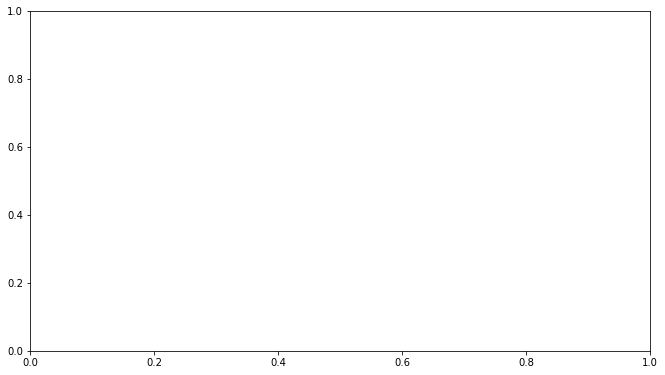

In [36]:
fig = plt.figure(figsize=(40, 15))
fig.subplots_adjust(hspace = 0.4, wspace=.3)

for i in range(0,6):
    plt.subplot(2,3,i+1)
    x = np.arange(1,17)
    x_seasons = np.arange(1,13,step = 3)

    # coeffisients
    y =slope_x1[i]
    
    # Seasonal
    #y_seasons = slope_seasons_x1[i]
    #standard_error_slope_seasons = np.array(standard_error_slope_seasons_x1)
    #y_error_seasons_x1 = standard_error_slope_seasons_x1
    #y_error_seasons = y_error_seasons_x1[i]
    

    # Monthly
    standard_error_slope_x1 = np.array(standard_error_slope_x1)
    y_error = standard_error_slope_x1*2
    y_error = y_error[i]


        
    plt.errorbar(x, y, yerr = y_error,fmt='o',markersize=5,capsize=4, color = 'k')
    
    # spring
    #plt.axhline(y = (y_seasons[0]- y_error_seasons[0]), xmin = 0.05, xmax = 0.22, color = 'r', linestyle ='solid',linewidth=0.5)
    #plt.axhline(y = (y_seasons[0] + y_error_seasons[0]), xmin = 0.05, xmax = 0.22, color = 'r', linestyle ='solid',linewidth=0.5)
    #plt.axhline(y = y_seasons[0], xmin = 0.05, xmax = 0.22, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # summer
    #plt.axhline(y = (y_seasons[1]- y_error_seasons[1]), xmin = 0.29, xmax = 0.46, color = 'r', linestyle ='solid',linewidth=0.5)
    #plt.axhline(y = (y_seasons[1] + y_error_seasons[1]), xmin = 0.29, xmax = 0.46, color = 'r', linestyle ='solid',linewidth=0.5)
    #plt.axhline(y = y_seasons[1], xmin = 0.29, xmax = 0.46, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # autumn
    #plt.axhline(y = (y_seasons[2]- y_error_seasons[2]), xmin = 0.51, xmax = 0.69, color = 'r', linestyle ='solid',linewidth=0.5)
    #plt.axhline(y = (y_seasons[2] + y_error_seasons[2]), xmin = 0.51, xmax = 0.69, color = 'r', linestyle ='solid',linewidth=0.5)
    #plt.axhline(y = y_seasons[2], xmin = 0.51, xmax = 0.69, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # winter
    #plt.axhline(y = (y_seasons[3]- y_error_seasons[3]), xmin = 0.78, xmax = 0.96, color = 'r', linestyle ='solid',linewidth=0.5)
    #plt.axhline(y = (y_seasons[3] + y_error_seasons[3]), xmin = 0.78, xmax = 0.96, color = 'r', linestyle ='solid',linewidth=0.5)
    #plt.axhline(y = y_seasons[3], xmin = 0.78, xmax = 0.96, color = 'k', linestyle ='solid',linewidth=0.6)
    
    plt.yticks(fontsize=24)
    #plt.xlabel('Month',fontsize=24)
    #plt.ylabel('Slope',fontsize=24)
    plt.ylim(-0.75,0.75)
    plt.axhline(y = 0, linestyle = 'dotted')
 

    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb'],fontsize=24)

    plt.title("Location ID " + str(i+1),fontsize = 24)

    
    
    
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.xlabel("Month",fontsize = 28,labelpad=35)
plt.ylabel("b_1 (slope)",fontsize = 28,labelpad=55)
plt.savefig('Loc_LR2_1.pdf', format='pdf', bbox_inches = 'tight',dpi=2000)

NameError: name 'slope' is not defined

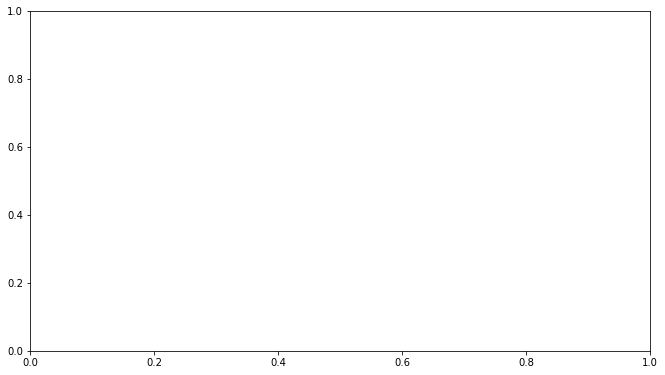

In [32]:
fig = plt.figure(figsize=(40, 15))
fig.subplots_adjust(hspace = 0.4, wspace=.3)

for i in range(6,12):
    plt.subplot(2,3,i-5)
    x = np.arange(1,13)
    x_seasons = np.arange(1,13,step = 3)

    # coeffisients
    y =slope[i]
    
    # Seasonal
    y_seasons = slope_seasons[i]
    standard_error_slope_seasons = np.array(standard_error_slope_seasons)
    y_error_seasons = standard_error_slope_seasons
    y_error_seasons = y_error_seasons[i]
    

    # Monthly
    standard_error_slope = np.array(standard_error_slope)
    y_error1 = standard_error_slope*2
    y_error1 = y_error1[i]


        
    plt.errorbar(x, y, yerr = y_error1,fmt='o',markersize=5,capsize=4, color = 'k')
    
    # spring
    plt.axhline(y = (y_seasons[0]- y_error_seasons[0]), xmin = 0.05, xmax = 0.22, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[0] + y_error_seasons[0]), xmin = 0.05, xmax = 0.22, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[0], xmin = 0.05, xmax = 0.22, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # summer
    plt.axhline(y = (y_seasons[1]- y_error_seasons[1]), xmin = 0.29, xmax = 0.46, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[1] + y_error_seasons[1]), xmin = 0.29, xmax = 0.46, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[1], xmin = 0.29, xmax = 0.46, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # autumn
    plt.axhline(y = (y_seasons[2]- y_error_seasons[2]), xmin = 0.51, xmax = 0.69, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[2] + y_error_seasons[2]), xmin = 0.51, xmax = 0.69, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[2], xmin = 0.51, xmax = 0.69, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # winter
    plt.axhline(y = (y_seasons[3]- y_error_seasons[3]), xmin = 0.78, xmax = 0.96, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[3] + y_error_seasons[3]), xmin = 0.78, xmax = 0.96, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[3], xmin = 0.78, xmax = 0.96, color = 'k', linestyle ='solid',linewidth=0.6)
    
    plt.yticks(fontsize=24)
    #plt.xlabel('Month',fontsize=24)
    #plt.ylabel('Slope',fontsize=24)
    plt.ylim(-0.75,0.75)
    plt.axhline(y = 0, linestyle = 'dotted')
 

    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb'],fontsize=24)

    plt.title("Location ID " + str(i+1),fontsize = 24)

    
    
    
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.xlabel("Month",fontsize = 28,labelpad=35)
plt.ylabel("b_1 (slope)",fontsize = 28,labelpad=55)
plt.savefig('Loc_slope_mean_daily_temp_prec_2.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

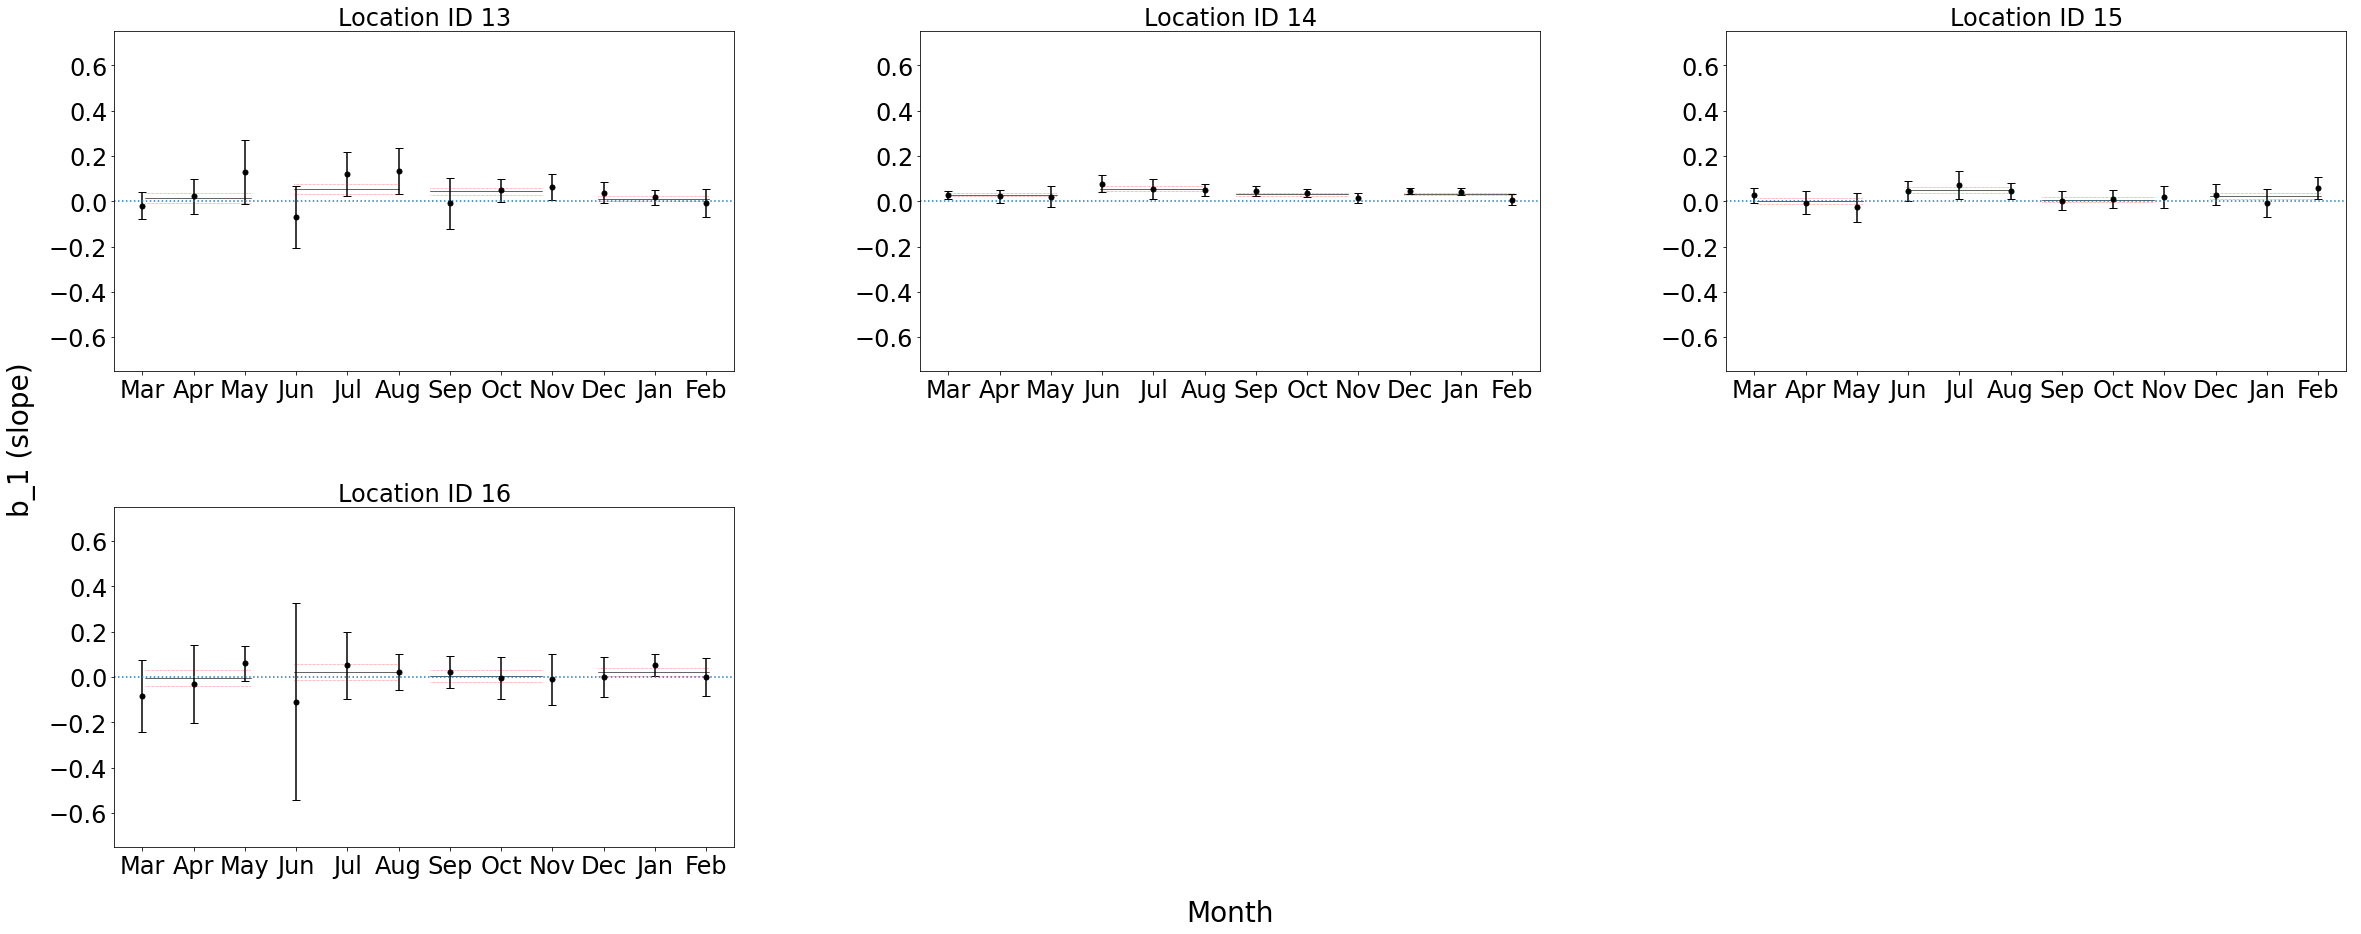

In [25]:
fig = plt.figure(figsize=(40, 15))
fig.subplots_adjust(hspace = 0.4, wspace=.3)

for i in range(12,16):
    plt.subplot(2,3,i-11)
    x = np.arange(1,13)
    x_seasons = np.arange(1,13,step = 3)

    # coeffisients
    y =slope[i]
    
    # Seasonal
    y_seasons = slope_seasons[i]
    standard_error_slope_seasons = np.array(standard_error_slope_seasons)
    y_error_seasons = standard_error_slope_seasons
    y_error_seasons = y_error_seasons[i]
    

    # Monthly
    standard_error_slope = np.array(standard_error_slope)
    y_error = standard_error_slope*2
    y_error = y_error[i]


        
    plt.errorbar(x, y, yerr = y_error,fmt='o',markersize=5,capsize=4, color = 'k')
    
    # spring
    plt.axhline(y = (y_seasons[0]- y_error_seasons[0]), xmin = 0.05, xmax = 0.22, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[0] + y_error_seasons[0]), xmin = 0.05, xmax = 0.22, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[0], xmin = 0.05, xmax = 0.22, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # summer
    plt.axhline(y = (y_seasons[1]- y_error_seasons[1]), xmin = 0.29, xmax = 0.46, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[1] + y_error_seasons[1]), xmin = 0.29, xmax = 0.46, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[1], xmin = 0.29, xmax = 0.46, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # autumn
    plt.axhline(y = (y_seasons[2]- y_error_seasons[2]), xmin = 0.51, xmax = 0.69, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[2] + y_error_seasons[2]), xmin = 0.51, xmax = 0.69, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[2], xmin = 0.51, xmax = 0.69, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # winter
    plt.axhline(y = (y_seasons[3]- y_error_seasons[3]), xmin = 0.78, xmax = 0.96, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[3] + y_error_seasons[3]), xmin = 0.78, xmax = 0.96, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[3], xmin = 0.78, xmax = 0.96, color = 'k', linestyle ='solid',linewidth=0.6)
    
    plt.yticks(fontsize=24)
    #plt.xlabel('Month',fontsize=24)
    #plt.ylabel('Slope',fontsize=24)
    plt.ylim(-0.75,0.75)
    plt.axhline(y = 0, linestyle = 'dotted')
 

    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb'],fontsize=24)

    plt.title("Location ID " + str(i+1),fontsize = 24)
    
    
    
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.xlabel("Month",fontsize = 28,labelpad=35)
plt.ylabel("b_1 (slope)",fontsize = 28,labelpad=55)
    
plt.savefig('Loc_slope_mean_daily_temp_prec_3.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

In [28]:
intercepts

[[-2.353230992929899,
  -1.5979944936490535,
  -2.5207675701018943,
  -0.3005838057861491,
  0.8872873989470965,
  -2.1028821494536962,
  -0.17813201912276602,
  -3.6284178951529205,
  -2.65578851877028,
  -2.500749313047165,
  -2.209281284924214,
  -2.175586715266986],
 [-1.192621989422672,
  -2.5819830884551633,
  -3.3582062629474563,
  -6.167650062850958,
  -6.442899425702542,
  -5.539227536260684,
  -3.6296467947297586,
  -3.3126871838518612,
  -2.9679194657196764,
  -1.5048937462874254,
  -0.9584647668795099,
  -1.0744963477559508],
 [-1.8953752785126403,
  -2.000584912369306,
  -3.351804706871974,
  -2.7528677967458455,
  -3.4280995398139185,
  -3.1265014711594907,
  -3.7318999140451368,
  -3.1195503682913746,
  -2.326058739396442,
  -2.817160182787799,
  -1.6811655059094806,
  -1.6307410021248576],
 [-2.5795522342913517,
  -2.9307549893721623,
  -5.30115115157548,
  -1.9497801711442029,
  -3.0101273105414985,
  -6.69004891118245,
  -3.656456937650935,
  -4.115513454167879,
  -2.

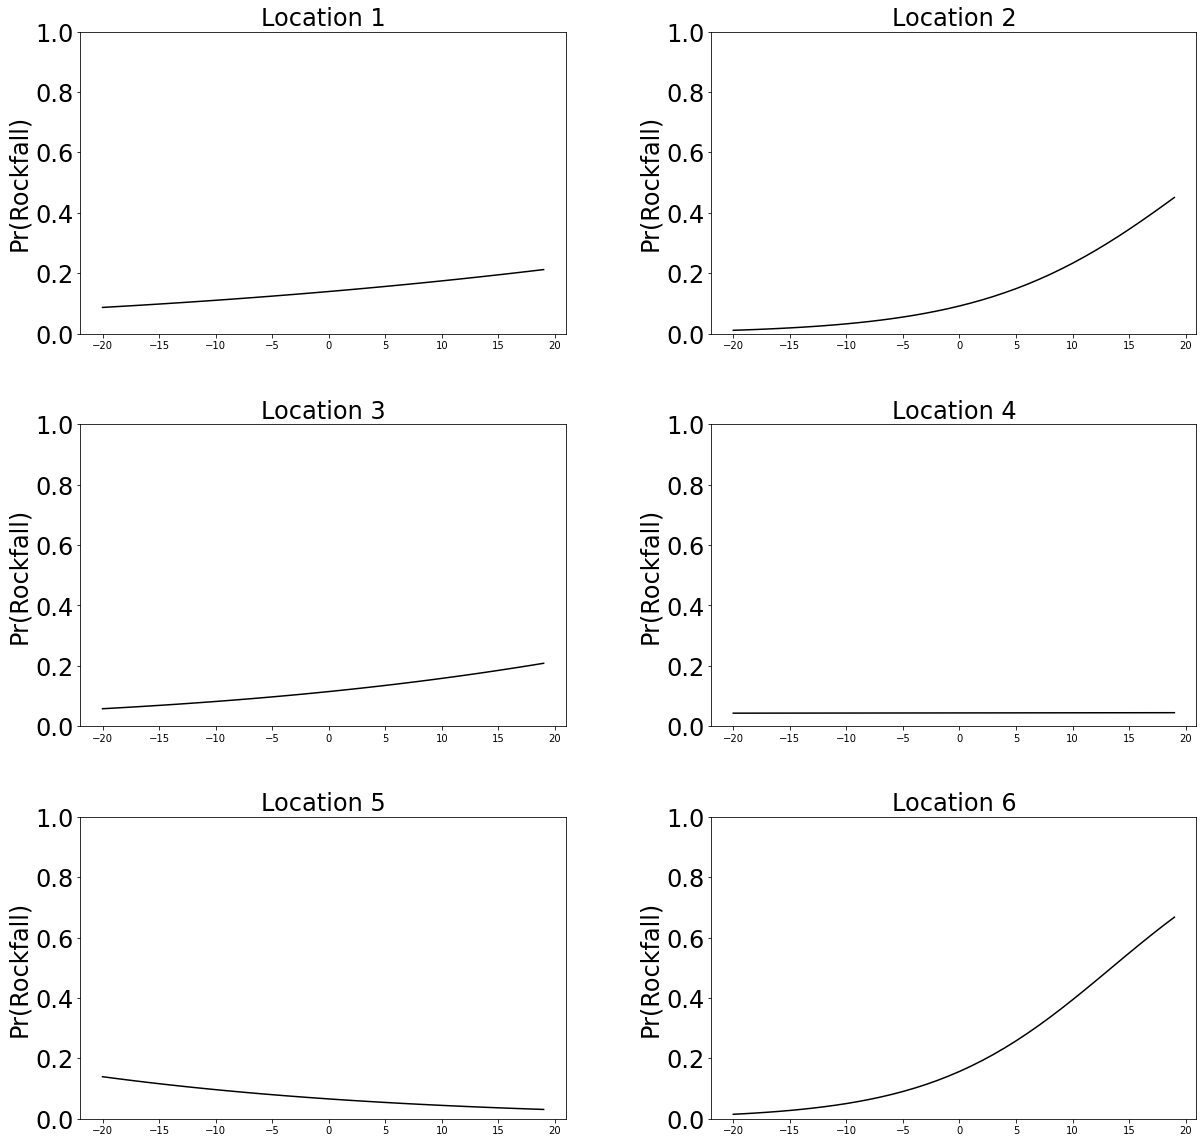

In [61]:
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace = 0.3, wspace=.3)

for i in range(0,6):
    plt.subplot(3,2,i+1)
    x= np.arange(-20,20)
    #x = np.arange(1,13)
    y = intercepts[i][3] + slope_x1[i][3]*x + slope_x2[i][3]
    prob = np.exp(y)/(1+np.exp(y))
        
    plt.plot(x, prob, color = 'k')
    
    
    plt.yticks(fontsize=24)
    #plt.xlabel('Month',fontsize=24)
    #plt.ylabel(y)
    plt.ylabel('Pr(Rockfall)',fontsize=24)
    plt.ylim(0,1)
    #plt.axhline(y = 0, linestyle = 'dotted')
 

    #plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb'],fontsize=18)

    plt.title("Location " + str(i+1),fontsize = 24)
    
plt.savefig('Prob_mean_daily_temp_prec_rockfall.pdf', format='pdf', bbox_inches = 'tight',dpi=2000)

In [ ]:
intercepts 
standard_error_coef 

slope_x1 

standard_error_slope_x1 

slope_x2 
standard_error_slope_x2 

slope_x3
standard_error_slope_x3 

significance 

In [31]:
slope_x3

[[-0.0027233538741462805,
  -0.018912009751403204,
  -0.009838671024035912,
  -0.0040027647401347935,
  -0.00043996802253105515,
  -0.006649021924109276,
  -0.006269590299960868,
  -0.012743355794985598,
  -0.008243350159306505,
  -0.01904382303150753,
  -0.011482417236316456,
  -0.04044973221762293],
 [0.015561082854508806,
  0.012593055719984309,
  0.025884392211598346,
  -0.0062349613156716275,
  0.0002537031653470872,
  0.008702605758544191,
  0.01938805751384069,
  0.00277006913184353,
  0.010470142656512164,
  0.01435352255264644,
  0.0005915210378828368,
  0.031226898794959098],
 [-0.0009415393193014428,
  -0.011235632189560828,
  0.011541511942371564,
  0.001495239987082419,
  0.0011006468320409314,
  0.014961518871753,
  0.003321947396479671,
  -0.001790128593084469,
  0.0013618062624657027,
  0.0050485647993707234,
  -0.0038464287275794505,
  -0.0023061051724297733],
 [0.027386688193875665,
  0.013508940667584686,
  0.006869356681538241,
  -0.024034386052991994,
  0.003130412

In [35]:
# daily mean temperature

locations = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

for i in range(0,12):
    data = {'Location': locations,
        'Intercept estimate': [item[i] for item in intercepts],
        'Slope x1': [item[i] for item in slope_x1],
        'Slope x2': [item[i] for item in slope_x2],
        'Slope x3': [item[i] for item in slope_x3],
        'LLR p < 0.05 ': [item[i] for item in significance]}

    data = pd.DataFrame(data)

    data.to_excel('Logistic_regression_mean_temp_and_daily_precipitation_summary' + str(i) + '.xlsx')

In [36]:
# daily mean temperature

locations = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

for i in range(0,12):
    data = {'Location': locations,
        'SE intercept': [item[i] for item in standard_error_coef],
        'SE x1': [item[i] for item in standard_error_slope_x1],
        'SE x2': [item[i] for item in standard_error_slope_x2],
        'SE x3': [item[i] for item in standard_error_slope_x3]}

    data = pd.DataFrame(data)

    data.to_excel('Logistic_regression_mean_temp_and_daily_precipitation_SE' + str(i) + '.xlsx')

In [45]:
mean_llh_months = np.mean(log_likelihood, axis=0)
mean_llh_months = pd.DataFrame(mean_llh_months)
mean_llh_months.to_excel('Log_likelihood_mean_daily_temp_and_prec' + '.xlsx')

In [13]:
locations = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

for i in range(0,12):
    data = {'Location': locations,
        'Log-likelihood':[item[i] for item in log_likelihood]}

    data = pd.DataFrame(data)

    data.to_excel('Logistic_regression_temp_and_precipitation_LogLikelihood' + str(i) + '.xlsx')

In [14]:
data

,Location,Log-likelihood
0,1,32.327268
1,2,78.289343
2,3,49.048009
3,4,51.624716
4,5,14.764007
5,6,96.674352
6,7,36.159292
7,8,5.489897
8,9,35.500904
9,10,10.627172
